In [1]:
# Mean Squared Error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [5]:
def mychall(x,y):
  ANNreg = nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  learnr = .05
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learnr)

  numepc = 500
  losses = torch.zeros(numepc)

  for epochi in range(numepc):
    yHat = ANNreg(x)

    loss = lossfun(yHat,y)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    predictions = ANNreg(x)

  return predictions,losses



In [6]:
def dataCreation(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2

  return x,y

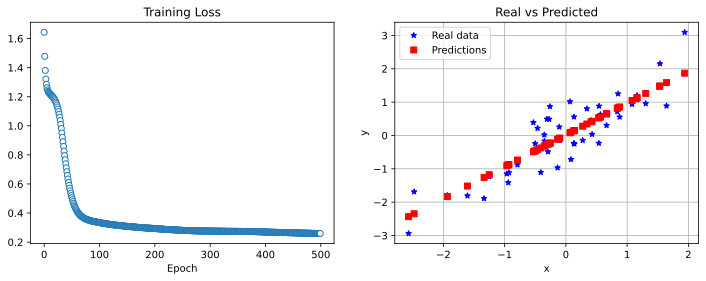

In [13]:
#Testing
x,y = dataCreation(1)
yHat,losses = mychall(x,y)

fig,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses.detach(), "o", markerfacecolor="w", linewidth=.1)
ax[0].set_xlabel("Epoch")
ax[0].set_title("Training Loss")

ax[1].plot(x,y,"b*", label="Real data")
ax[1].plot(x,yHat.detach(),"rs", label="Predictions")
ax[1].legend(loc="upper left")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Real vs Predicted")

plt.grid()
plt.show()

In [ ]:
slopes = torch.linspace(-2,2,21)
amountExps = 50
results = torch.zeros((len(slopes),amountExps,2))